## NPOS function predictor
### Authors:
#### Piotr Franc 160306
#### Paweł Charkiewicz 160288

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

2025-10-26 02:22:36.980811: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761441757.072806   77438 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761441757.097944   77438 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761441757.287485   77438 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761441757.287518   77438 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761441757.287520   77438 computation_placer.cc:177] computation placer alr

In [2]:
def getProbability(df):
    combinations = np.indices((2,) * len(df)).reshape(len(df), -1).T.astype(int)
    p = np.maximum((1-combinations)*(1-df.pActive.values), (combinations*df.pActive.values)).prod(1)
    prob = (combinations * df.popularity.values)[1:] / (combinations * df.popularity.values).sum(1).reshape((-1,1))[1:]
    x=(p.reshape((-1,1))[1:] * prob)

    return x.sum(axis=0)

In [3]:
def generate_data(n_samples=10000):
    X_list = []
    y_list = []

    for _ in range(n_samples):
        n_validators = np.random.randint(1, 17)

        pActive = np.random.rand(n_validators)

        popularity = np.clip(np.random.rand(n_validators) + 0.01, 0.01, 1)

        df = pd.DataFrame({'pActive': pActive, 'popularity': popularity})

        probabilities = getProbability(df)

        pActive_padded = np.pad(pActive, (0, 16 - n_validators), constant_values=0)
        popularity_padded = np.pad(popularity, (0, 16 - n_validators), constant_values=0)
        probabilities_padded = np.pad(probabilities, (0, 16 - n_validators), constant_values=0)

        X = np.concatenate([pActive_padded, popularity_padded])

        X_list.append(X)
        y_list.append(probabilities_padded)

    return np.array(X_list), np.array(y_list)

In [4]:
def project1(df):
    n_validators = len(df)

    pActive = df['pActive'].values
    popularity = df['popularity'].values

    pActive_padded = np.pad(pActive, (0, 16 - n_validators), constant_values=0)
    popularity_padded = np.pad(popularity, (0, 16 - n_validators), constant_values=0)

    X = np.concatenate([pActive_padded, popularity_padded]).reshape(1, -1)

    predictions = model.predict(X, verbose=0)[0]

    return predictions[:n_validators]

I0000 00:00:1761441849.723291   77438 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9709 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:05:00.0, compute capability: 8.6


Epoch 1/50


I0000 00:00:1761441851.873396   77676 service.cc:152] XLA service 0x7bee5c00bc70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761441851.873437   77676 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-10-26 02:24:11.914076: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1761441852.064014   77676 cuda_dnn.cc:529] Loaded cuDNN version 90501
2025-10-26 02:24:13.016579: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_238', 8 bytes spill stores, 8 bytes spill loads

2025-10-26 02:24:13.032947: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_245', 12

 60/625 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0869 - loss: 0.1129 - mae: 0.2885 - mse: 0.1129

I0000 00:00:1761441856.065612   77676 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3280 - loss: 0.0279 - mae: 0.0961 - mse: 0.0279 - val_accuracy: 0.6724 - val_loss: 0.0021 - val_mae: 0.0253 - val_mse: 0.0021 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7362 - loss: 0.0014 - mae: 0.0221 - mse: 0.0014 - val_accuracy: 0.8463 - val_loss: 5.8791e-04 - val_mae: 0.0149 - val_mse: 5.8791e-04 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8615 - loss: 5.1114e-04 - mae: 0.0139 - mse: 5.1114e-04 - val_accuracy: 0.8794 - val_loss: 4.0033e-04 - val_mae: 0.0123 - val_mse: 4.0033e-04 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8871 - loss: 3.6428e-04 - mae: 0.0118 - mse: 3.6428e-04 - val_accuracy: 0.8957 - val_loss: 3.2067e-04 - val_mae: 0.0112 - val_mse: 3.2067e-04 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8968 - loss: 3.0403e-04 - mae: 0.0108 - m

2025-10-26 02:26:05.949841: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_25', 12 bytes spill stores, 12 bytes spill loads

2025-10-26 02:26:06.019585: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_18', 12 bytes spill stores, 12 bytes spill loads

2025-10-26 02:26:06.324112: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_25', 4 bytes spill stores, 4 bytes spill loads



4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 402ms/step


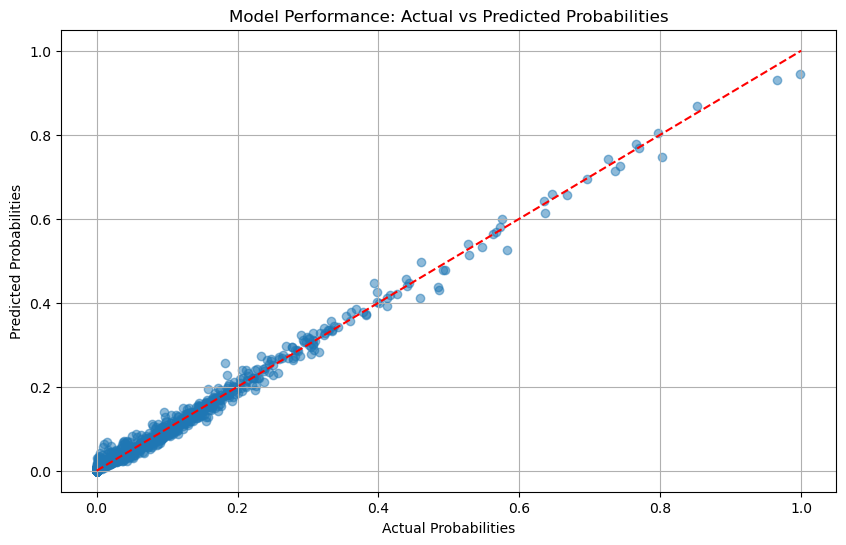

In [5]:
# 1. Generate training data
X_train, Y_train = generate_data(50000)

# 2. Create model
model = Sequential([
    Input(shape=(32,)),
    Dense(128, 'relu'),
    Dense(128, 'relu'),
    Dense(64, 'relu'),
    Dense(16, 'sigmoid')
])
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse', 'accuracy'])

# 3. Train with callbacks
early = EarlyStopping(patience=10, restore_best_weights=True)
reduce = ReduceLROnPlateau(patience=5)
history = model.fit(X_train, Y_train, epochs=50, batch_size=64,
                    validation_split=0.2, callbacks=[early, reduce])

# 4. Generate test data with various validator counts
print("Generating test data...")
X_val, actual = generate_data(100)

# 5. Calculate and display overall metrics
print("Evaluating model...")
predictions = model.predict(X_val)

# Create a scatter plot of actual vs predicted probabilities
plt.figure(figsize=(10, 6))
plt.scatter(actual.flatten(), predictions.flatten(), alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line represents perfect predictions
plt.xlabel('Actual Probabilities')
plt.ylabel('Predicted Probabilities')
plt.title('Model Performance: Actual vs Predicted Probabilities')
plt.grid(True)
plt.show()

In [6]:
pActive = np.random.rand(14)
popularity = np.clip(np.random.rand(14) + 0.01, 0.01, 1)
df = pd.DataFrame({'pActive': pActive, 'popularity': popularity})

project1(df)

array([0.24934612, 0.01313309, 0.10853667, 0.09723519, 0.02829487,
       0.02190489, 0.02464968, 0.13309038, 0.01761327, 0.04280617,
       0.06795946, 0.06643616, 0.08145   , 0.03625068], dtype=float32)

In [7]:
getProbability(df)

array([0.24148952, 0.0040512 , 0.11408302, 0.0970271 , 0.02887229,
       0.01866783, 0.03014512, 0.12448852, 0.02347307, 0.02171298,
       0.08846533, 0.07031163, 0.09864011, 0.03857169])

In [8]:
predictions = model.predict(X_val)

mse = np.mean((predictions - actual) ** 2)
mae = np.mean(np.abs(predictions - actual))

print(f"MSE: {mse:.6f}")
print(f"MAE: {mae:.6f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
MSE: 0.000098
MAE: 0.005772
